<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/datatransformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Transformation

Data transformation is important for a variety of statistical tests and proper model building (e.g. make time series stationary). A few examples of data transformations based on two different data types: white noise series and random walk series.

*Author: Alexander Del Toro Barba*

**Import Libraries**

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from scipy import stats

# Create Data

**Random Walk Process**

In [0]:
import numpy as np
def geometric_brownian_motion(T = 1, N = 100, mu = 0.1, sigma = 0.01, S0 = 20):        
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) ### geometric brownian motion ###
    return S

dates = pd.date_range('2012-01-01', '2019-02-22')
T = (dates.max()-dates.min()).days / 365
N = dates.size
start_price = 100
randomwalk = pd.Series(
    geometric_brownian_motion(T, N, sigma=0.1, S0=start_price), index=dates)

**White Noise Process**

In [0]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot

# seed random number generator
seed(1)

# create white noise series
whitenoise = [gauss(0.0, 1.0) for i in range(3000)]
whitenoise = Series(whitenoise)

# Visualize Data

## Random Walk Process

Text(0, 0.5, 'Value')

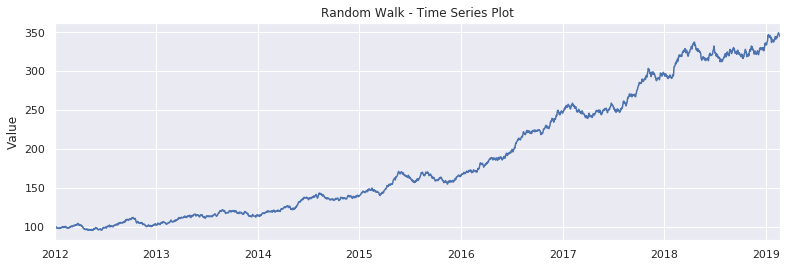

In [4]:
df = randomwalk
sns.set(rc={'figure.figsize':(13, 4)})
df.plot(linewidth=1.5,title='Random Walk - Time Series Plot')
plt.ylabel('Value')

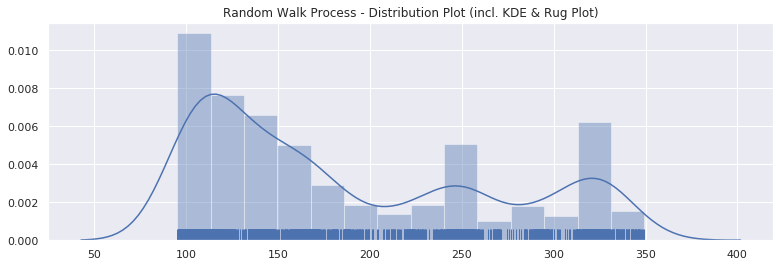

In [5]:
df = randomwalk
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('Random Walk Process - Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

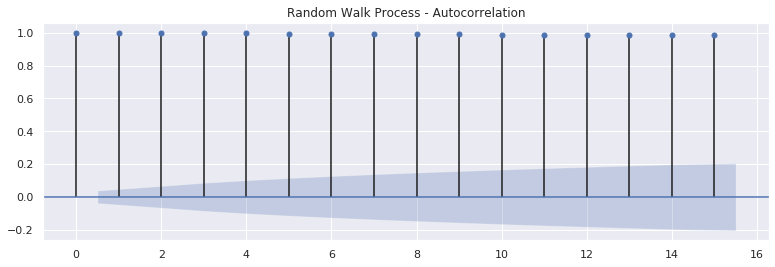

In [6]:
sns.set(rc={'figure.figsize':(13, 4)})
sm.graphics.tsa.plot_acf(randomwalk.squeeze(), lags=15)
plt.title('Random Walk Process - Autocorrelation')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


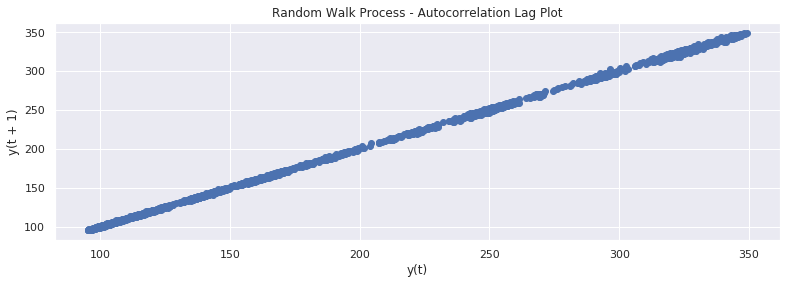

In [7]:
from pandas.plotting import lag_plot
lag_plot(randomwalk)
plt.title('Random Walk Process - Autocorrelation Lag Plot')
plt.show()

## White Noise Process

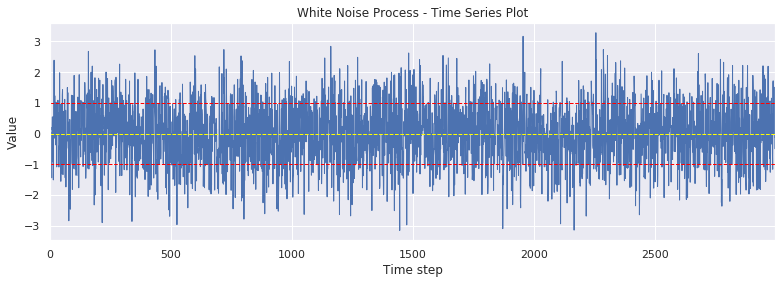

In [8]:
df = whitenoise
sns.set(rc={'figure.figsize':(13, 4)})
df.plot(linewidth=1.0,title='White Noise Process - Time Series Plot')
plt.ylabel('Value')
plt.xlabel('Time step')
plt.axhline(y=1, color='red', linestyle='--', linewidth=1.0);
plt.axhline(y=-1, color='red', linestyle='--', linewidth=1.0);
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.0);

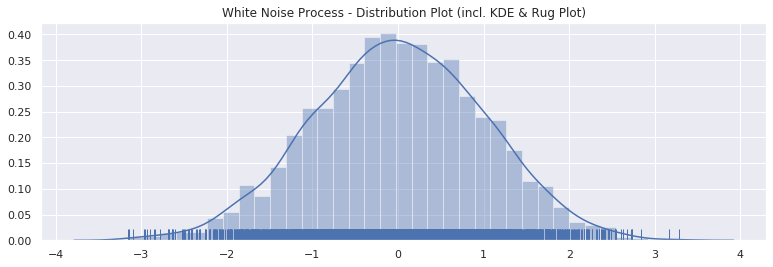

In [9]:
df = whitenoise
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('White Noise Process - Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

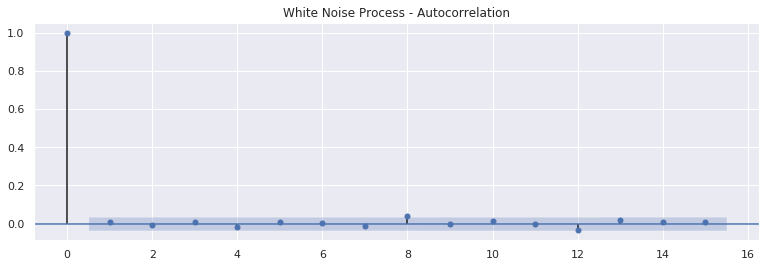

In [10]:
sns.set(rc={'figure.figsize':(13, 4)})
sm.graphics.tsa.plot_acf(whitenoise.squeeze(), lags=15)
plt.title('White Noise Process - Autocorrelation')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


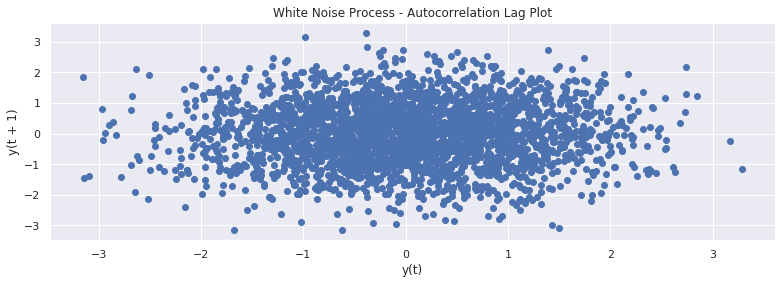

In [11]:
from pandas.plotting import lag_plot
lag_plot(whitenoise)
plt.title('White Noise Process - Autocorrelation Lag Plot')
plt.show()

# Select Data Source

In [0]:
# series = whitenoise
series = randomwalk

# Transformations

## Percentage Differenced

**Time Series Plot**

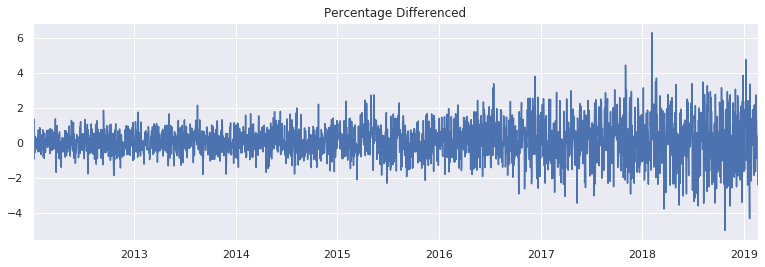

In [39]:
# Percentage Differenced
percentage = series / series.shift(1) -1
df.plot(title='Percentage Differenced')

**Distribution of Transformed Time Series**

In [0]:
# Remove nan value
percentage.dropna(inplace=True)

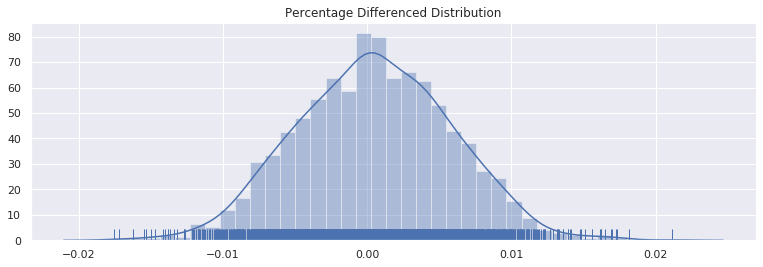

In [47]:
df = percentage
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('Percentage Differenced Distribution')
plt.show()

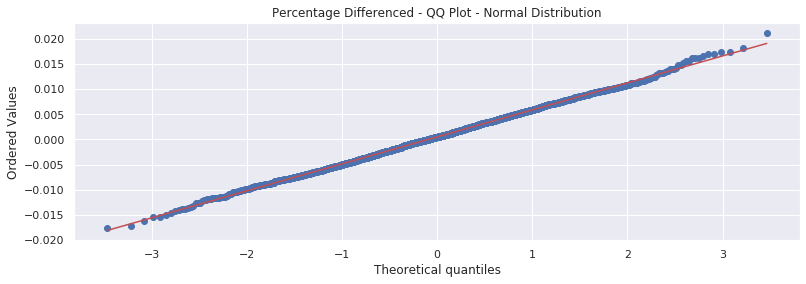

In [46]:
df = percentage
stats.probplot(df, dist="norm", plot=plt)
plt.title('Percentage Differenced - QQ Plot - Normal Distribution')
plt.show()

In [45]:
# Augmented Dickey Fuller Test
# H0: There is a unit root for the series (non stationary)
# no constant, no trend
from statsmodels.tsa.stattools import adfuller
statsmodels.tsa.stattools.adfuller(percentage, maxlag=None, regression='nc', autolag='AIC', store=False, regresults=False)

(-47.98332578196543,
 0.0,
 0,
 2608,
 {'1%': -2.566597818527937,
  '10%': -1.616718557099342,
  '5%': -1.9411034837692647},
 -19654.101074283335)

Visually also visible and per test confirmed (p-value = 0.00, H0 rejected). Time series is stationary with difference transform.

## Differenced

**Time Series Plot**

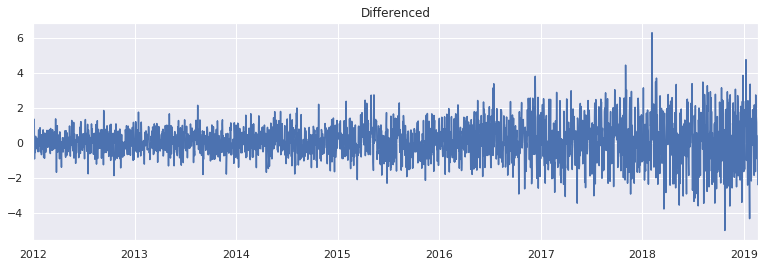

In [14]:
# Differenced
differenced = series - series.shift(1)
differenced.plot(title='Differenced')

**Distribution of Transformed Time Series**

In [0]:
# Remove nan value
differenced.dropna(inplace=True)

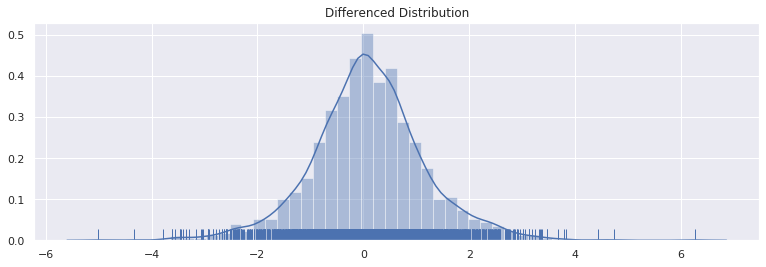

In [37]:
df = differenced
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('Differenced Distribution')
plt.show()

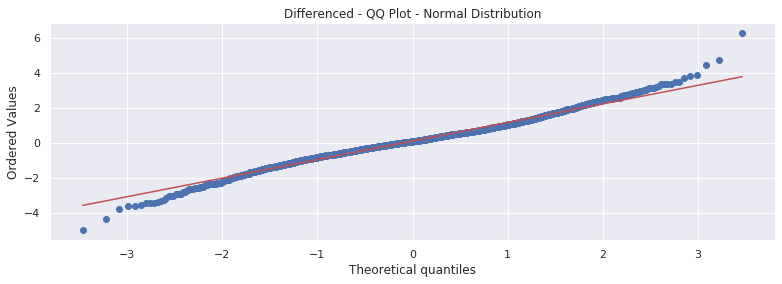

In [36]:
df = differenced
stats.probplot(df, dist="norm", plot=plt)
plt.title('Differenced - QQ Plot - Normal Distribution')
plt.show()

In [38]:
# Augmented Dickey Fuller Test
# H0: There is a unit root for the series (non stationary)
# no constant, no trend
from statsmodels.tsa.stattools import adfuller
statsmodels.tsa.stattools.adfuller(differenced, maxlag=None, regression='nc', autolag='AIC', store=False, regresults=False)

(-47.06969347203109,
 0.0,
 0,
 2608,
 {'1%': -2.566597818527937,
  '10%': -1.616718557099342,
  '5%': -1.9411034837692647},
 7685.044158751118)

Visually also visible and per test confirmed (p-value = 0.00, H0 rejected). Time series is stationary with difference transform.

## Log Return

**Time Series Plot**

In [0]:
# Log Return
lr = np.log(series/series.shift(1)).dropna()
lr.plot(title='Log Returns')

**Distribution of Transformed Time Series**

In [0]:
df = lr
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('Log Return - Distribution')
plt.show()

In [0]:
df = lr
stats.probplot(df, dist="norm", plot=plt)
plt.title('Log Return - QQ Plot - Normal Distribution')
plt.show()

In [0]:
# Augmented Dickey Fuller Test
# H0: There is a unit root for the series (non stationary)
# no constant, no trend
from statsmodels.tsa.stattools import adfuller
statsmodels.tsa.stattools.adfuller(lr, maxlag=None, regression='nc', autolag='AIC', store=False, regresults=False)

Visually also visible and per test confirmed (p-value = 0.00, H0 rejected). Time series is stationary with log return transform.

## Square Root

**Time Series Plot**

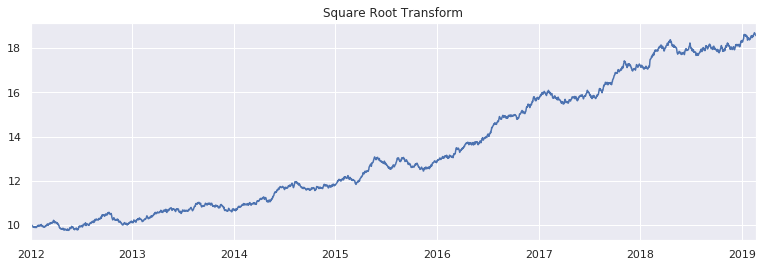

In [15]:
# Square Root Transform
sr = np.sqrt(series)
sr.plot(title='Square Root Transform')

**Distribution of Transformed Time Series**

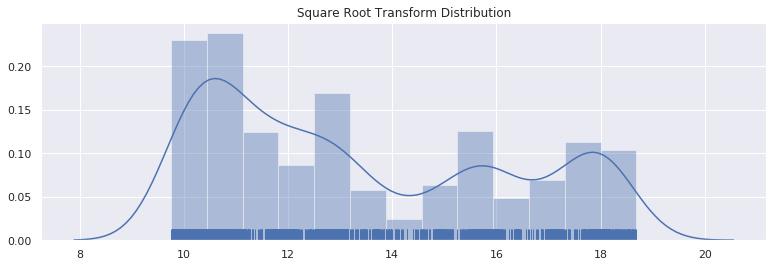

In [21]:
df = sr
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('Square Root Transform Distribution')
plt.show()

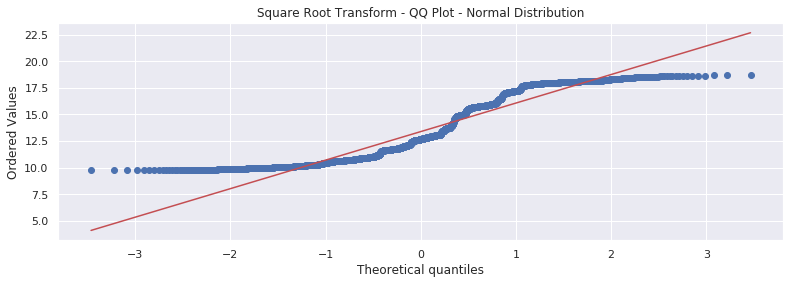

In [26]:
df = sr
stats.probplot(df, dist="norm", plot=plt)
plt.title('Square Root Transform - QQ Plot - Normal Distribution')
plt.show()

In [31]:
# Augmented Dickey Fuller Test
# H0: There is a unit root for the series (non stationary)
# no constant, no trend
from statsmodels.tsa.stattools import adfuller
statsmodels.tsa.stattools.adfuller(sr, maxlag=None, regression='nc', autolag='AIC', store=False, regresults=False)

(4.434758714119308,
 0.9999999995774169,
 1,
 2608,
 {'1%': -2.566597818527937,
  '10%': -1.616718557099342,
  '5%': -1.9411034837692647},
 -9801.742800851021)

Visually also visible and per test confirmed (p-value > 0.05, H0 not rejected). Time series is not stationary with square root transform.

## First Derivative

**Time Series Plot**

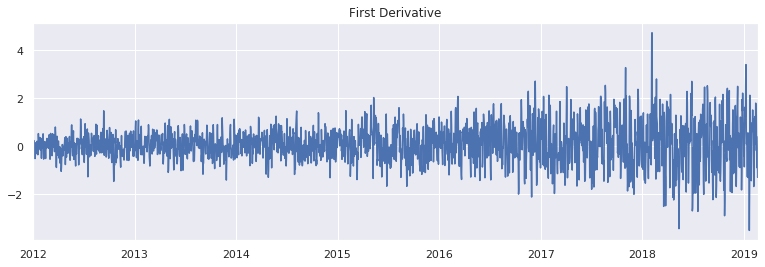

In [18]:
# First Derivative
fd = pd.Series(np.gradient(series), series.index, name='slope')
fd.plot(title='First Derivative')

**Distribution of Transformed Time Series**

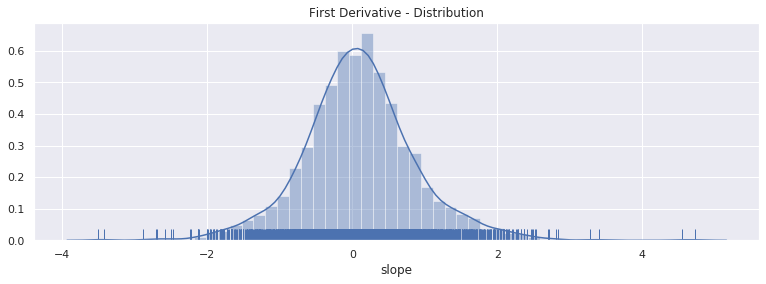

In [23]:
df = fd
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((df), hist=True, rug=True).set_title('First Derivative - Distribution')
plt.show()

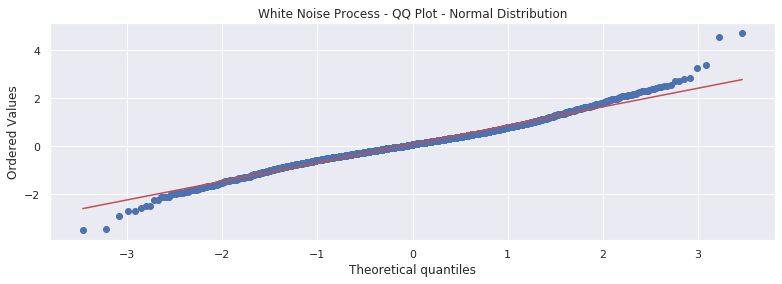

In [24]:
df = fd
stats.probplot(df, dist="norm", plot=plt)
plt.title('First Derivative - QQ Plot - Normal Distribution')
plt.show()

In [29]:
# Augmented Dickey Fuller Test
# H0: There is a unit root for the series (non stationary)
# no constant, no trend
from statsmodels.tsa.stattools import adfuller
statsmodels.tsa.stattools.adfuller(fd, maxlag=None, regression='nc', autolag='AIC', store=False, regresults=False)

(-7.6362420531150175,
 2.213585302474631e-12,
 26,
 2583,
 {'1%': -2.5666061262799786,
  '10%': -1.6167175791384434,
  '5%': -1.9411044901544552},
 4200.469962297354)

Visually also visible and per test confirmed (p-value < 0.05, H0 rejected). Time series is stationary with first derivative transform.